# Proyek Analisis Data: Nama dataset
- Nama: Karna Mandarawata
- Email: karna.mandara@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 Barang apa yang paling banyak terjual
- pertanyaan 2 most Payment type used 

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

## Data Wrangling

In [8]:
#cek customers data
customers_df = pd.read_csv("data/customers_dataset.csv")


In [10]:
orders_data_df = pd.read_csv("data/orders_dataset.csv")


In [12]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")


In [16]:
products_df = pd.read_csv("data/products_dataset.csv")


In [17]:
products_en_df = pd.read_csv("data/product_category_name_translation.csv")


In [20]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")


### Assessing Data

In [33]:
#load table 
print ("Mengeluarkan data")
customers_df.head()


Mengeluarkan data


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [30]:
#show info 
print("Customer Info table")
customers_df.info()


Customer Info table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [39]:
#check missing values in the dataset
print("Cek jumlah value yang kosong pada table customer")
customers_df.isnull().sum()


Cek jumlah value yang kosong pada table customer


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [40]:
#chcek duplicated
print("Jumlah data ganda pada table customer : ",customers_df.duplicated().sum())

Jumlah data ganda pada table customer :  0


In [41]:
#load orders data
print("Mengeluarkan data pada table orders")
orders_data_df.head()

Mengeluarkan data pada table orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [42]:
print("Melihat info table pada table order data")
orders_data_df.info()

Melihat info table pada table order data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [48]:
print("Jumlah value kosong pada table order data:", orders_data_df.isnull().sum())

Jumlah value kosong pada table order data: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [45]:
print("Jumlah data ganda pada table order data:", orders_data_df.duplicated().sum())

Jumlah data ganda pada table order data: 0


In [49]:
# load order items
print("Mengeluarkan data pada table order items")
order_items_df.head()

Mengeluarkan data pada table order items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [52]:
print("Melihat info table pada table order items")
order_items_df.info()

Melihat info table pada table order items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [54]:
print("Jumlah value kosong pada table order items:", order_items_df.isnull().sum())


Jumlah value kosong pada table order items: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [56]:
print("Jumlah data ganda pada table order items:", order_items_df.duplicated().sum())

Jumlah data ganda pada table order items: 0


In [57]:
#load product 
print("Mengeluarkan data product")
products_df.head()

Mengeluarkan data product


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [59]:
print("Melihat info table pada table product")
products_df.info()

Melihat info table pada table product
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [60]:
print("Jumlah value kosong pada table product:", products_df.isnull().sum())


Jumlah value kosong pada table product: product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [61]:
print("Jumlah data ganda pada table order data:", products_df.duplicated().sum())

Jumlah data ganda pada table order data: 0


In [62]:
print("Mengeluarkan data pada table product label in english")
products_en_df.head()

Mengeluarkan data pada table product label in english


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [63]:
print("Milhat info table pada table product_En")
products_en_df.info()

Milhat info table pada table product_En
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [64]:
print("Jumlah value kosong pada table product label in English:", products_en_df.isnull().sum())


Jumlah value kosong pada table product label in English: product_category_name            0
product_category_name_english    0
dtype: int64


In [65]:
print("Jumlah data ganda pada table product in English:", products_en_df.duplicated().sum())

Jumlah data ganda pada table product in English: 0


In [66]:
print("Mengeluarkan data pada table payment type")
order_payments_df.head()

Mengeluarkan data pada table payment type


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
print("Informasi pada table payment")
order_payments_df.info

Informasi pada table payment


<bound method DataFrame.info of                                 order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value

In [68]:
print("Jumlah value kosong pada table payment:", order_payments_df.isnull().sum())


Jumlah value kosong pada table payment: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [69]:
print("Jumlah data ganda pada table payment:", order_payments_df.duplicated().sum())

Jumlah data ganda pada table payment: 0


### Cleaning Data

In [71]:
print("Droping missing value on products dataset")
products_df.dropna(axis=0, inplace=True)

Droping missing value on products dataset


## Exploratory Data Analysis (EDA)

### Explore ...

In [76]:
customers_df = pd.read_csv("data/customers_dataset.csv")
orders_data_df = pd.read_csv("data/orders_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
products_df = pd.read_csv("data/products_dataset.csv")
products_en_df = pd.read_csv("data/product_category_name_translation.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
join_cs_df = pd.merge(
    left=customers_df,
    right=orders_data_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

join_cs_df = pd.merge(
    left=join_cs_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

join_cs_df = pd.merge(
left= join_cs_df,
right=products_df,
how="inner",
left_on="product_id",
right_on="product_id"

)
join_cs_df = pd.merge(
left= join_cs_df,
right=products_en_df,
how="inner",
left_on="product_category_name",
right_on="product_category_name"

)
join_cs_df = pd.merge(
left= join_cs_df,
right=order_payments_df,
how="inner",
left_on="order_id",
right_on="order_id"

)
selected_columns = ['customer_id','order_id','payment_type','order_status','order_approved_at','customer_city','product_id','product_category_name_english','product_category_name','seller_id','price','freight_value']
selected_cs_df = join_cs_df[selected_columns]

selected_cs_df.head()

# print("duplicated data on orders items: ",orders_items_df.duplicated().sum())
# print("duplicated data on orders items: ",orders_data_df.duplicated().sum())

#customers_df.info()

#order_items_df.isna().sum()



most_sold_item = join_cs_df.groupby(['order_approved_at','product_category_name_english']).size().reset_index(name='count')

most_sold_item_per_date = most_sold_item.loc[most_sold_item.groupby('order_approved_at')['count'].idxmax()]
most_sold_item_per_date['order_approved_at'] = pd.to_datetime(most_sold_item_per_date['order_approved_at'])
most_sold_item_per_date['date_only'] = most_sold_item_per_date['order_approved_at'].dt.date


grouped_by_date_item = most_sold_item_per_date.groupby(['product_category_name_english','date_only'])['count'].sum().reset_index(name='total_count')

grouped_by_month_item = grouped_by_date_item.copy() 
grouped_by_month_item['date_only'] = pd.to_datetime(grouped_by_month_item['date_only']) 

grouped_by_month_item['month_year'] = grouped_by_month_item['date_only'].dt.to_period('M')

grouped_by_month = grouped_by_month_item.groupby(['product_category_name_english','month_year'])['total_count'].sum().reset_index(name='total_count')

grouped_by_month.head()
# most_sold_item_per_date.head()
# most_sold_seller = join_cs_df['seller_id'].value_counts().idxmax()
# print("Paling banyak terjual", most_sold_item)
# print("Seller paling banyak penjualan", most_sold_seller)
#

# Assuming 'most_sold_items_per_date' has the 'order_date', 'item_name', and 'count' columns
# and you want to find the most sold item for each month

most_sold_item_per_date['order_approved_at'] = pd.to_datetime(most_sold_item_per_date['order_approved_at'])
most_sold_item_per_date['month'] = most_sold_item_per_date['order_approved_at'].dt.to_period('M')

# Group by month and item_name, and find the most sold item for each month
most_sold_items_by_month = most_sold_item_per_date.groupby(['month', 'product_category_name_english'])['count'].sum().reset_index(name='total_count')
most_sold_items_by_month = most_sold_items_by_month.loc[most_sold_items_by_month.groupby('month')['total_count'].idxmax()]

# Showing per month sale on product
most_sold_items_by_month.head()

most_sold_items_by_month.to_csv("dashboard/most_sold_items_by_month.csv")

most_sold_item_per_date['order_approved_at'] = pd.to_datetime(most_sold_item_per_date['order_approved_at'])
most_sold_item_per_date['year'] = most_sold_item_per_date['order_approved_at'].dt.to_period('Y')

# Group by year and item_name, and find the most sold item for each year
most_sold_items_by_year = most_sold_item_per_date.groupby(['year', 'product_category_name_english'])['count'].sum().reset_index(name='total_count')
most_sold_items_by_year = most_sold_items_by_year.loc[most_sold_items_by_year.groupby('year')['total_count'].idxmax()]
# showing per year sale on product 

most_sold_items_by_year.head()
most_sold_items_by_year.to_csv("dashboard/most_sold_items_by_year.csv")

item_counts = join_cs_df['product_category_name_english'].value_counts()
seller_counts = join_cs_df['seller_id'].value_counts()
custermer_city_counts = join_cs_df['customer_city'].value_counts()
payment_type = join_cs_df['payment_type'].value_counts()
#buat dataframe dengan item_counts
item_counts_df = pd.DataFrame({'product_category_name_english':item_counts.index,'count':item_counts.values})
seller_count_df = pd.DataFrame({'seller_id':seller_counts.index,'count':seller_counts.values})
custermer_city_counts_df = pd.DataFrame({'customer_city':custermer_city_counts.index,'count':custermer_city_counts.values})
payment_type_df = pd.DataFrame({'payment_type':payment_type.index,'count':payment_type.values})

#buat kolom baru dengan ranking dari count 

item_counts_df['rank'] = item_counts_df['count'].rank(ascending=False,method='dense')
seller_count_df['rank'] = seller_count_df['count'].rank(ascending=False,method='dense')
custermer_city_counts_df['rank'] = custermer_city_counts_df['count'].rank(ascending=False,method='dense')
payment_type_df['rank'] = payment_type_df['count'].rank(ascending=False,method='dense')
#liat ranking item yang paling banyak terjual 

print(item_counts_df.sort_values(by='rank').head())
print(seller_count_df.sort_values(by='rank').head())
print(custermer_city_counts_df.sort_values(by='rank').head())
print(payment_type_df.sort_values(by='rank').head())

payment_type_df.sort_values(by='rank').to_csv('dashboard/payments_type.csv')




  product_category_name_english  count  rank
0                bed_bath_table  11823   1.0
1                 health_beauty   9972   2.0
2                sports_leisure   8945   3.0
3               furniture_decor   8744   4.0
4         computers_accessories   8082   5.0
                          seller_id  count  rank
0  4a3ca9315b744ce9f8e9374361493884   2133   1.0
1  6560211a19b47992c3666cc44a7e94c0   2122   2.0
2  1f50f920176fa81dab994f9023523100   2008   3.0
3  cc419e0650a3c5ba77189a1882b7556a   1847   4.0
4  da8622b14eb17ae2831f4ac5b9dab84a   1639   5.0
    customer_city  count  rank
0       sao paulo  18277   1.0
1  rio de janeiro   8066   2.0
2  belo horizonte   3191   3.0
3        brasilia   2425   4.0
4        curitiba   1792   5.0
  payment_type  count  rank
0  credit_card  85523   1.0
1       boleto  22542   2.0
2      voucher   6155   3.0
3   debit_card   1658   4.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

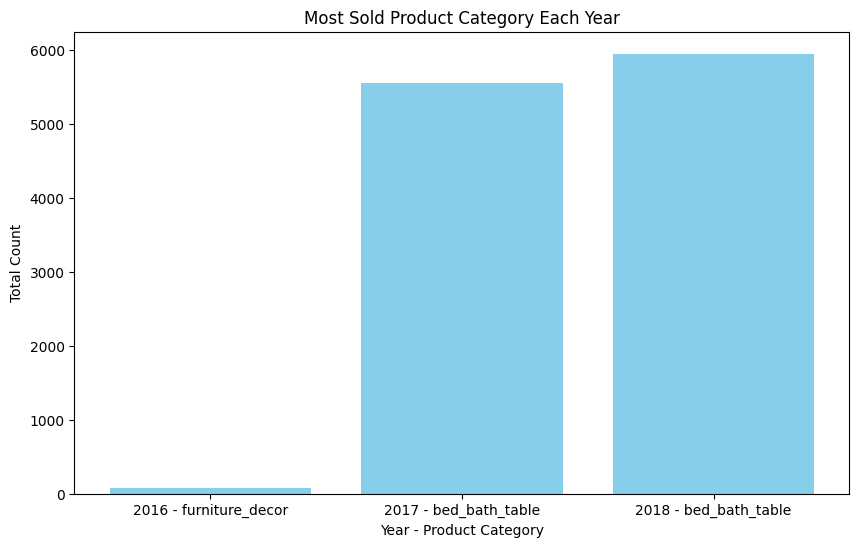

In [77]:
df = pd.DataFrame(most_sold_items_by_year)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['year'].astype(str) + ' - ' + df['product_category_name_english'], df['total_count'], color='skyblue')
plt.xlabel('Year - Product Category')
plt.ylabel('Total Count')
plt.title('Most Sold Product Category Each Year')
plt.show()

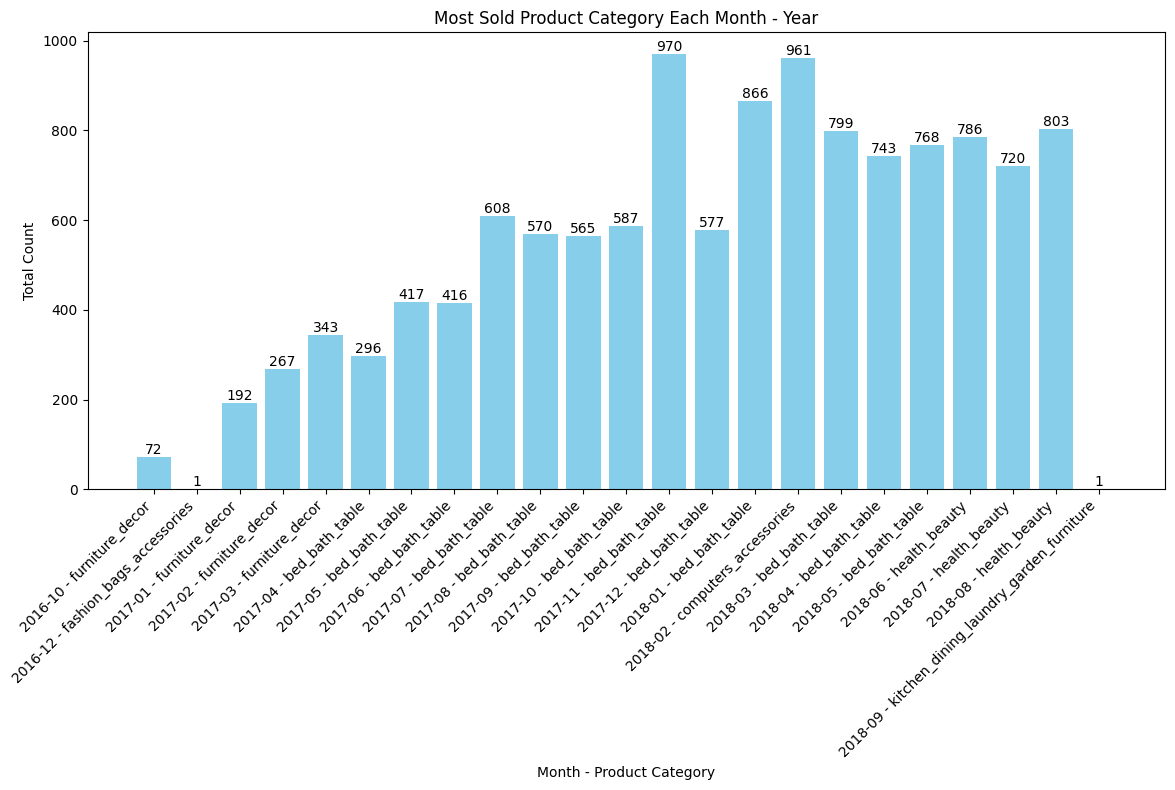

In [78]:
df = pd.DataFrame(most_sold_items_by_month)
# Create a bar chart
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(df['month'].astype(str) + ' - ' + df['product_category_name_english'], df['total_count'], color='skyblue')

# Format x-axis ticks and labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month - Product Category')
plt.ylabel('Total Count')
plt.title('Most Sold Product Category Each Month - Year')

# Add data labels on top of the bars
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pertanyaan 2: 

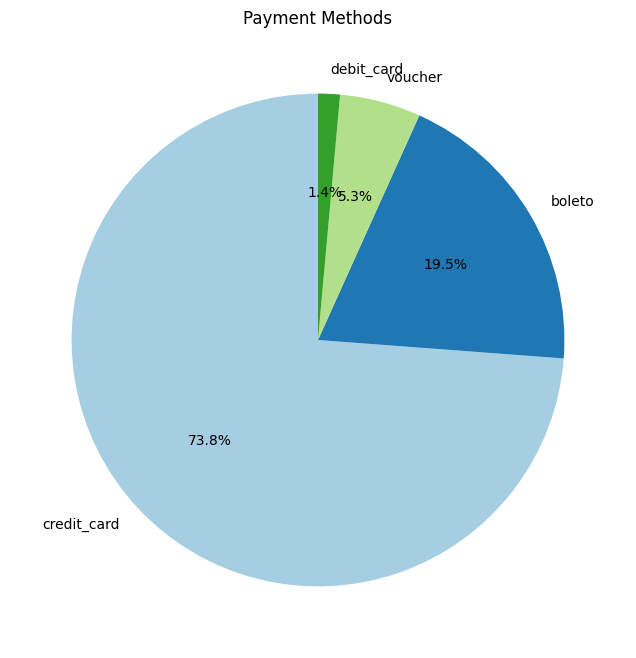

In [79]:
df = pd.DataFrame(payment_type_df)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_type_df['count'], labels=payment_type_df['payment_type'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Payment Methods')

# Show the plot
plt.show()


## Conclusion

- Bisa dilihat dari table jumlah penjualan bahwa di tahun 2017 dan 2018 penjualan bed_bath_table mendominasi dari penjualan yang lain namun jika di breakdown perbulan terdapat juga penjualan lain yang signifikan jumlahnya. maka bisa ditarik kesimpulan bahwa perusahaan sudah sepatutnya untuk tetap atau bisa meningkatkan produksi bed_bath_table agar bisa memenuhi permintaan pasar di tahun-tahun berikutnya.

- Agar bisa menarik dan meningkatkan loyalitas konsumen, kita bisa memberikan insentif berupa diskon kepada pengguna kartu kredit tentu dengan bekerja sama dengan pihak penyelenggara kartu kredit. 